In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [93]:
import matplotlib.pyplot as plt

In [45]:
# In the real world
# 1. run singleVesselUQSA.xml with standard simulator?
# 2. run VascularPolynomialChaos.py  on the singleVesselUQSA.xml to produce vpcCase
# 3. run VascularPolynomialChaos.py on the resulting vpc.xml to evaluate all

import sys, os
import shutil
import numpy as np
import math
import starfish.UtilityLib.moduleFilePathHandler as mFPH
import starfish.UtilityLib.moduleXML as mXML
import starfish.VascularPolynomialChaosLib.classDistributionManager as cDistMng
import starfish.VascularPolynomialChaosLib.moduleFilePathHandlerVPC as mFPH_VPC
import starfish.VascularPolynomialChaosLib.moduleBatchSimulationManager as mBSM
import starfish.VascularPolynomialChaosLib.classUqsaCase as cUqsaCase
import starfish.VascularPolynomialChaosLib.classRandomInput as cRI

In [11]:
networkName = "singleVesselUQSA"
dataNumber = "exm"

# create template configuration
configurationFilePathTemplate = mFPH_VPC.getFilePath('uqsaCaseTemplateFile', networkName, dataNumber, 'read')
uqsaCase = cUqsaCase.UqsaCase()
uqsaCase.loadXMLFile(configurationFilePathTemplate)

# TODO: check if file exits and ask if it should be overwritten        
uqsaCaseFile = mFPH_VPC.getFilePath('uqsaCaseXmlFile', networkName, dataNumber, 'write')
uqsaCase.writeXMLFile(uqsaCaseFile)
# copy network file
toCopyFile = mFPH.getFilePath('networkXmlFile', networkName, 'xxx','write')
destinationFile = mFPH_VPC.getFilePath('vpcNetworkXmlFile', networkName, dataNumber,'write')
shutil.copy(toCopyFile, destinationFile)

Command 'git diff --quiet --exit-code' returned non-zero exit status 1
         git hash does not correspond to actual code version!


In [14]:
uqsaCase = cUqsaCase.UqsaCase() 
uqsaCase.loadXMLFile(uqsaCaseFile)
uqsaCase.initialize(networkName,dataNumber)

('Info classUQSACase 96: running ', 'MC-40')
('Info classUQSACase 96: running ', 'PC-1')
('Info classUQSACase 96: running ', 'MCpb-20')
('Info classUQSACase 96: running ', 'MC-20')


In [18]:
loi = uqsaCase.locationOfInterestManager.locationsOfInterest['exampleLocation']

In [19]:
loi.queryLocation

'vessel_1'

In [22]:
qoi = loi.quantitiesOfInterest['Flow']

In [29]:
vpcNetworkXmlFile = mFPH_VPC.getFilePath('vpcNetworkXmlFile', networkName, dataNumber, 'write')
vascularNetwork = mXML.loadNetworkFromXML(networkName, dataNumber, networkXmlFile = vpcNetworkXmlFile)
# TODO: steps 1.1 and 1.2 should be entirely external to the UQSA core
    

In [86]:
import starfish.SolverLib.class1DflowSolver as c1dFS
flowSolver = c1dFS.FlowSolver(vascularNetwork, quiet=True)
flowSolver.solve()

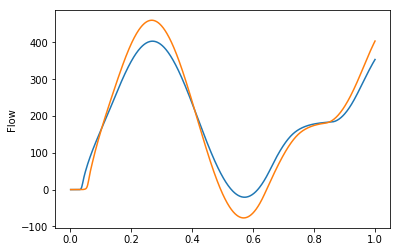

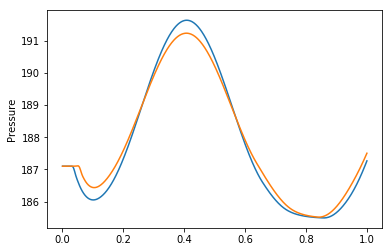

In [108]:
vessel =vascularNetwork.vessels[1]
plt.figure()
plt.plot(vascularNetwork.simulationTime[1:], vessel.Qsol[1:,30]*1e6)
plt.plot(vascularNetwork.simulationTime[1:], vessel.Qsol[1:,20]*1e6)
plt.ylabel("Flow")

plt.figure()
plt.plot(vascularNetwork.simulationTime[1:], vessel.Psol[1:,30]/133.32)
plt.plot(vascularNetwork.simulationTime[1:], vessel.Psol[1:,20]/133.32)
plt.ylabel("Pressure")
plt.show()

In [30]:
rim = vascularNetwork.randomInputManager


In [53]:
vessel = vascularNetwork.vessels[1]
vessel.A0

In [59]:
vessel.initialize(vascularNetwork.globalFluid)

In [62]:
vessel.As

0.00271546702606

In [74]:
# Create a random input
Z = cRI.ParametricRandomInput()
Z.a = vessel.As
pct_unc = 0.05
Z.b = pct_unc*vessel.As
Z.distributionType = 'Uniform'
Z.parameter = "vessel_1_As"

In [75]:
rim.randomInputs['Z3']=Z

In [76]:
rim.printOutInfo()


 Defined Random Inputs

Id  | variableName         | location              | distribution
-------------------------------------------------------------------- 

None | []                   | -                     | 0.0 + 2.0 U(0,1) 


None | []                   | vessel                | 1.2 + 0.8 age 
    |                      | 1                     | 
    |                      | betaHayashi           | 


None | []                   | vessel                | 13000.0 + 632.0 U(0,1) 
    |                      | 1                     | 
    |                      | Ps                    | 


None | []                   | vessel                | 0.00271546702606 + 0.000135773351303 U(0,1) 
    |                      | 1                     | 
    |                      | As                    | 



 Defined Random Variables

Id  | variableName         | location              | distribution
-------------------------------------------------------------------- 



In [82]:
vascularNetwork.initialize()
vascularNetwork.vessels

{1: <starfish.NetworkLib.classVessel.Vessel at 0x7ff09c570dd0>}

In [83]:
# Save changes
uqsaCase.writeXMLFile(uqsaCaseFile)
mXML.writeNetworkToXML(vascularNetwork, dataNumber=dataNumber, networkXmlFile=vpcNetworkXmlFile)
#vascularNetwork.writeXMLFile(vpcNetworkXmlFile)

Command 'git diff --quiet --exit-code' returned non-zero exit status 1
         git hash does not correspond to actual code version!


In [7]:
uqsaCase = cUqsaCase.UqsaCase() 
uqsaCase.loadXMLFile(uqsaCaseFile)
uqsaCase.initialize(networkName,dataNumber)


vpcNetworkXmlFileSol = os.path.join(*[".", "singleVesselUQSA", "vascularPolynomialChaos_tst",  "singleVesselUQSA_vpc_tst.xml"])
vpcNetworkXmlFile = mFPH_VPC.getFilePath('vpcNetworkXmlFile', networkName, dataNumber, 'write')
if not os.path.exists(os.path.split(vpcNetworkXmlFileSol)[0]):
    os.makedirs(os.path.split(vpcNetworkXmlFileSol)[0])
shutil.copy(vpcNetworkXmlFileSol, vpcNetworkXmlFile)

# 1.2 load vascular network file polynomial chaos
vpcNetworkXmlFileSol = os.path.join(*[".", "singleVesselUQSA", "vascularPolynomialChaos_tst",  "singleVesselUQSA_vpc_tst.xml"])
vpcNetworkXmlFile = mFPH_VPC.getFilePath('vpcNetworkXmlFile', networkName, dataNumber, 'write')
if not os.path.exists(os.path.split(vpcNetworkXmlFileSol)[0]):
    os.makedirs(os.path.split(vpcNetworkXmlFileSol)[0])
shutil.copy(vpcNetworkXmlFileSol, vpcNetworkXmlFile)

vascularNetwork = mXML.loadNetworkFromXML(networkName, dataNumber, networkXmlFile = vpcNetworkXmlFile)
# TODO: steps 1.1 and 1.2 should be entirely external to the UQSA core

# 1.3 initialized defined random inputs
vascularNetwork.randomInputManager.initialize(vascularNetwork)


IOError: [Errno 2] No such file or directory: './singleVesselUQSA/vascularPolynomialChaos_exm/singleVesselUQSA_uqsaCase_exm.xml'